# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [453]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики.

In [454]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf


def uniform(size=1, precision=30):
    if type(size) == int:
        size = (size,)
    return (coin(precision * np.prod(size)).reshape(size + (precision,)) * 
            np.logspace(start=0, stop=precision - 1, base=2, num=precision, dtype=int)).sum(axis=-1) * (2 ** (-precision))


def plot_uniform_density(size=200):
    grid = np.linspace(-0.25, 1.25, 500)
    values = uniform(size)

    plt.figure(figsize=(10, 10))
    ax = plt.axes()
    ax.set_title('Равномерное распределение', fontsize=18)
    ax.hist(values, alpha=0.4, bins=10, density=True, edgecolor = 'white', label='Гистограмма случайных величин')
    ax.plot(grid, uniform_pdf(grid), label='Плотность $U(0, 1)$', color='#FF3300', lw=5, alpha=0.5)
    ax.scatter(x=values, y=[0]*size, alpha=0.4, s=50, label='Случайные величины', color='#68248C')
    ax.legend(fontsize=15, loc='upper right')
    ax.grid()
    return plt.gcf()


def plot_uniform_different_precision(size=100):
    plt.figure(figsize=(15, 3))
    plt.suptitle('$U(0, 1)$ в зависимости от параметра precision', fontsize=18)

    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        subplt = plt.subplot(3, 2, i + 1)
        subplt.grid()
        subplt.set_ylabel(f"precision = {precision}", labelpad=60, rotation=0, fontsize=15)

        plt.scatter(
            uniform(size, precision),
            np.zeros(size),
            alpha=0.4
        )

        plt.yticks([])
        if i < 4:
            plt.xticks([])

    plt.subplots_adjust(left=0.1, wspace=0.5)
    return plt.gcf()


def normal(size=1, loc=0, scale=1, precision=30):
    return loc + scale * np.sin(2 * np.pi * uniform(size, precision)) * np.sqrt(-2 * np.log(uniform(size, precision)))


def plot_normal_density(size=200):
    grid = np.linspace(-3, 3, 500)
    values = normal(size)

    plt.figure(figsize=(10, 10))
    ax = plt.axes()
    ax.set_title('Нормальное распределение', fontsize=18)
    ax.hist(values, alpha=0.4, bins=10, density=True, edgecolor = 'white', label='Гистограмма случайных величин')
    ax.plot(grid, norm_pdf(grid), label='Плотность $N(0, 1)$', color='#FF3300', lw=5, alpha=0.5)
    ax.scatter(x=values, y=[0]*size, alpha=0.4, s=50, label='Случайные величины', color='#68248C')
    ax.legend(fontsize=15, loc='upper right')
    ax.grid()
    return plt.gcf()


def expon(size=1, lambd=1, precision=30):
    return (-1) * np.log(1 - uniform(size, precision)) / lambd


def plot_expon_density(size=100):
    grid = np.linspace(-0.5, 5, 500)
    values = expon(size)
    
    plt.figure(figsize=(10, 10))
    ax = plt.axes()
    ax.set_title('Экспоненциальное распределение', fontsize=18)
    ax.hist(values, alpha=0.4, bins=10, density=True, edgecolor = 'white', label='Гистограмма случайных величин')
    ax.plot(grid, expon_pdf(grid), label='Плотность $Exp(1)$', color='#FF3300', lw=5, alpha=0.5)
    ax.scatter(x=values, y=[0]*size, alpha=0.4, s=50, label='Случайные величины', color='#68248C')
    ax.legend(fontsize=15, loc='upper right')
    ax.grid()
    return plt.gcf()

/tmp/ipykernel_62371/632783540.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_uniform_density(size=200).show()


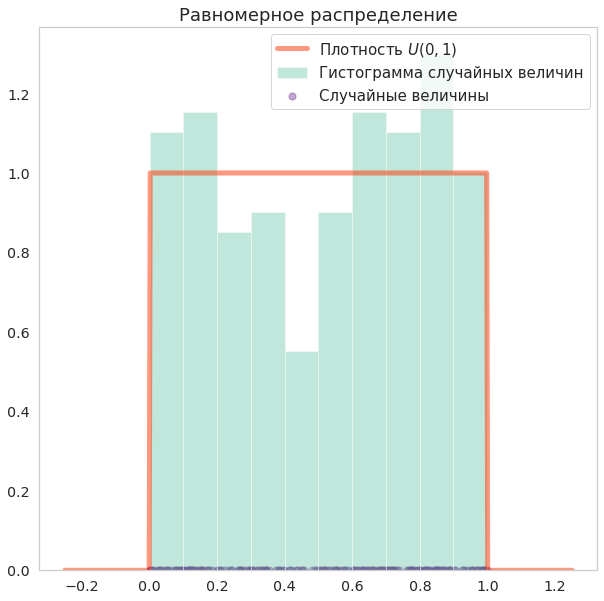

In [455]:
plot_uniform_density(size=200).show()

/tmp/ipykernel_62371/1150031119.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_uniform_different_precision(size=100).show()


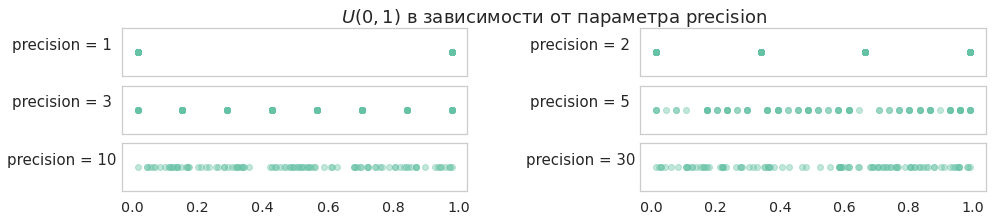

In [456]:
plot_uniform_different_precision(size=100).show()

/tmp/ipykernel_62371/929650917.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_normal_density(size=200).show()


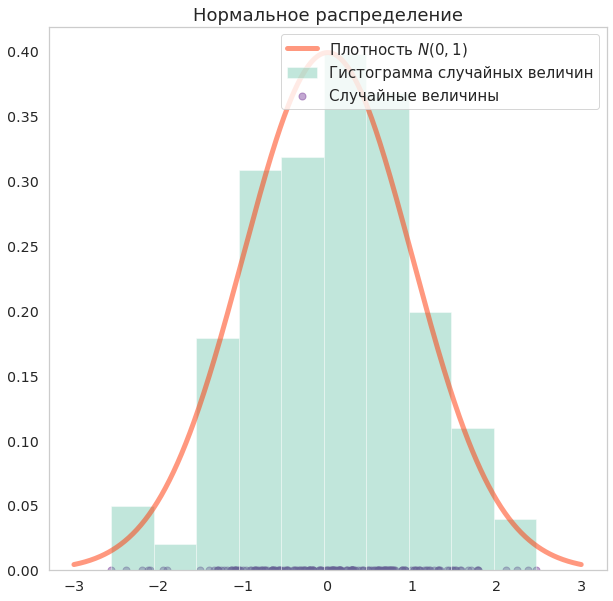

In [457]:
plot_normal_density(size=200).show()

/tmp/ipykernel_62371/1423611139.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_expon_density(size=100).show()


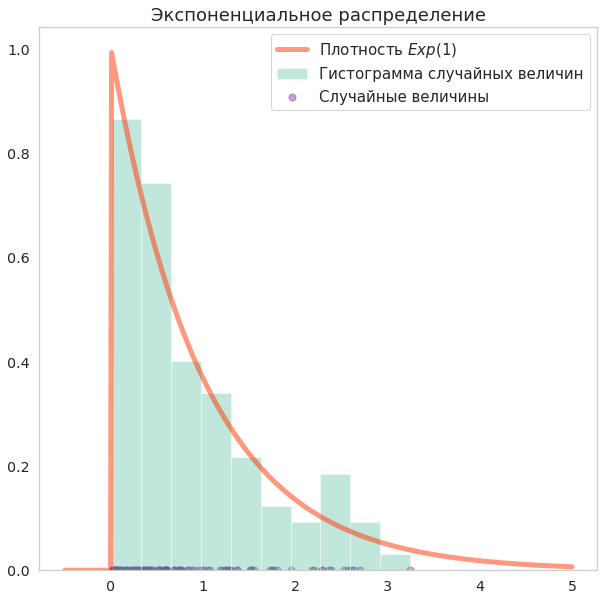

In [458]:
plot_expon_density(size=100).show()

**Выводы:**

На графиках видно, что распределения сгенерированных случайныех величин совпадают с их истинными расределениями (U(0, 1), N(0,1), Exp(1)). При увеличении размера выборки совпадение будет более точным. 

На графике зависимости сгенерированного U(0,1) от параметра precision видно, что при увеличении precision распределение случайных величин стремится к истинному распределению U(0,1).

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

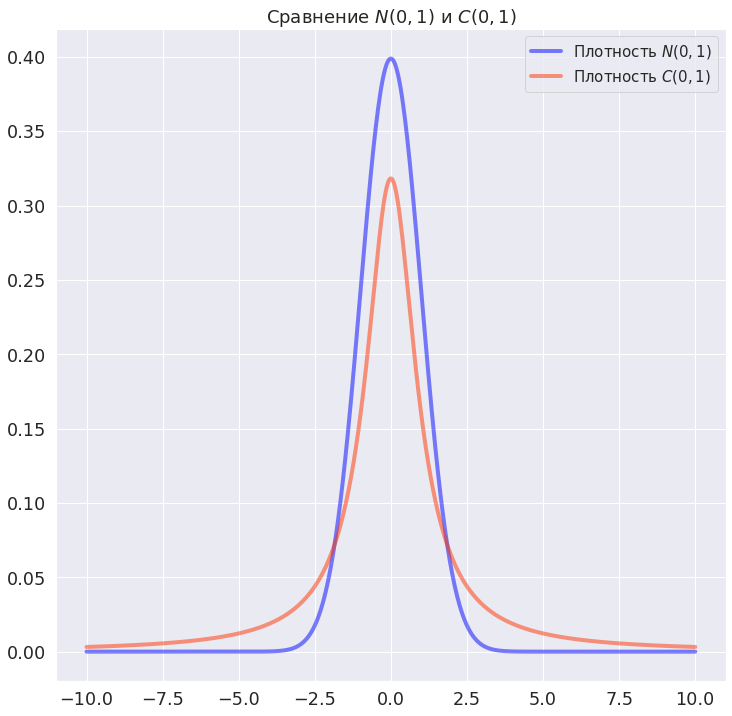

In [459]:
import scipy.stats as sps
sns.set(font_scale=1.6)

grid = np.linspace(-10, 10, 500)
plt.figure(figsize=(12, 12))
ax = plt.axes()
ax.set_title('Сравнение $N(0, 1)$ и $C(0, 1)$', fontsize=18)
ax.plot(grid, sps.norm.pdf(grid), label='Плотность $N(0, 1)$', color='#0004FF', lw=4, alpha=0.5)
ax.plot(grid, sps.cauchy.pdf(grid), label='Плотность $C(0, 1)$', color='#FF3300', lw=4, alpha=0.5)
ax.legend(fontsize=15, loc='best')

**2.** Повторите эксперимент с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

Сгенерируем случайные величины, распределенные C(0,1), выборку и подсчитаем средние значения префиксных сумм.

In [460]:
size = 500  # количество случайных величин
samples_count = 500  # количество выборок

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

Изобразим полученные средние на графике.

(-50.0, 50.0)

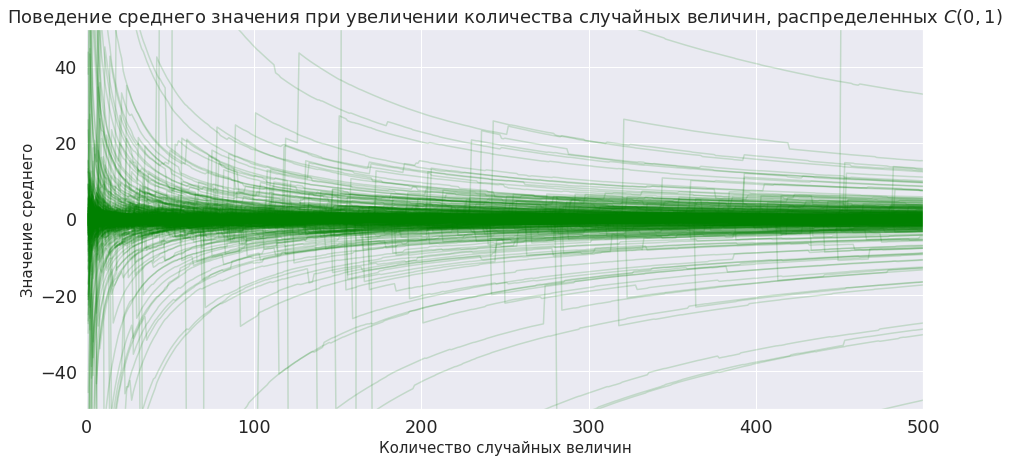

In [461]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.17)

plt.title('Поведение среднего значения при увеличении количества случайных величин, распределенных $C(0, 1)$', fontsize=18)
plt.xlabel('Количество случайных величин', fontsize=15)
plt.ylabel('Значение среднего', fontsize=15)
plt.xlim((0, size));
plt.ylim((-50, 50))

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

Подсчитаем значения медиан при увеличении числа случайных величин.

In [462]:
cum_meds = []
for i in range(size):
    cum_meds += [np.median(samples[:,:i+1], axis=1)]
cum_meds = np.array(cum_meds).T

Изобразим полученные медианы на графике.

(-3.0, 3.0)

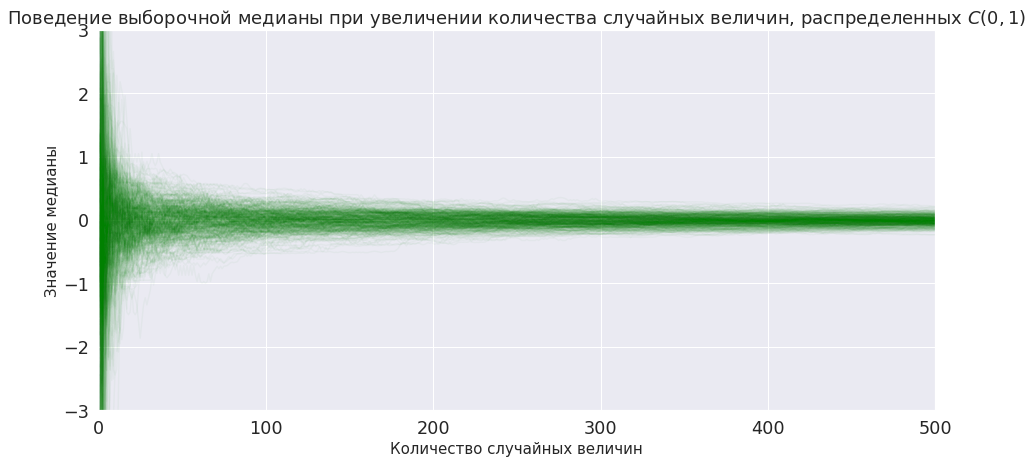

In [463]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_meds[i], color='green', alpha=0.03)

plt.title('Поведение выборочной медианы при увеличении количества случайных величин, распределенных $C(0, 1)$', fontsize=18)
plt.xlabel('Количество случайных величин', fontsize=15)
plt.ylabel('Значение медианы', fontsize=15)
plt.xlim((0, size));
plt.ylim((-3, 3))

**Вывод:**

На графике плотностей нормального распределения и распределения Коши видно, что при стремлении к -inf и к +inf плотность распределения Коши убывает медленнее.

Закон больших чисел не выполняется для распределения Коши, так как:
1) Распределение Коши не имеет математического ожидания

2) На графике поведения среднего значения при увеличении количества случайных величин, распределенных C(0, 1), видно, что значения среднего не имеют общего предела при стремлении к +inf, так как при любом удалении от 0 имеются "скачки" среднего значения (большие выбросы)

На графике поведения выборочной медианы при увеличении количества случайных величин, распределенных C(0, 1), видно, что выборочная медиана стремится к 0 при стремлении числа случайных величин к +inf.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах.

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

**Выводы:**

...